# Assignment 6

### 1.复习上课内容以及复现课程代码

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
/
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x  #gpu
except Exception:
    print("pass")
import tensorflow as tf

import cProfile

pass


In [5]:
import ssl
os.environ['http_proxy'] = 'http://127.0.0.1:1087'
os.environ['https_proxy'] = 'https://127.0.0.1:1087'

ssl._create_default_https_context = ssl._create_unverified_context


In [5]:
tf.executing_eagerly()

True

In [6]:
x = [[2.]]
m = tf.matmul(x,x)    # 矩阵乘法
print("matrix matmul:{}".format(m)) # 

matrix matmul:[[4.]]


In [7]:
a = tf.constant([[1,2],[3,4]])
b = tf.add(a,1)    # 矩阵的广播加法及加法运算
b

<tf.Tensor: id=5, shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

In [8]:
tf.add(a,a)


<tf.Tensor: id=6, shape=(2, 2), dtype=int32, numpy=
array([[2, 4],
       [6, 8]], dtype=int32)>

In [9]:
a*b   # 矩阵的元素级乘法运算

<tf.Tensor: id=7, shape=(2, 2), dtype=int32, numpy=
array([[ 2,  6],
       [12, 20]], dtype=int32)>

In [10]:
a.numpy()    # tensor转化为array

array([[1, 2],
       [3, 4]], dtype=int32)

In [11]:
# tf求导
w = tf.Variable([[1.]])
with tf.GradientTape() as tape:
    loss = w*w    # W^2的倒数是2*w
grad = tape.gradient(loss, w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [60]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [61]:
y_train.shape

(60000,)

In [62]:
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]


In [63]:
x_train.shape

(10000, 28, 28)

In [64]:
import numpy as np

In [65]:
t = np.array([1,2])
t.shape

(2,)

In [66]:
t[:,tf.newaxis]/255

array([[0.00392157],
       [0.00784314]])

In [67]:
t[:,tf.newaxis][:,tf.newaxis,:].shape    # tf.newaxis：在第二个维度位置新加一个维度

(2, 1, 1)

In [68]:
t[:,tf.newaxis][::,tf.newaxis].shape

(2, 1, 1)

In [69]:
x_train = tf.cast(x_train[:,:,:,tf.newaxis]/255, tf.float32)
x_test = tf.cast(x_test[:,:,:,tf.newaxis]/255, tf.float32)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [70]:
y_train.shape

(10000, 10)

## build Model


In [71]:
tf.keras.layers.Dropout?

### build Model using Sequential

In [72]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,[3,3], activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64,[3,3], activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

### build Model using Model

In [73]:
inputs = tf.keras.Input(shape=(None,None,1), name="digits")
conv_1 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(inputs)
conv_2 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(conv_1)
ave_pool = tf.keras.layers.GlobalAveragePooling2D()(conv_2)
outputs = tf.keras.layers.Dense(10)(ave_pool)
mnist_model_2 = tf.keras.Model(inputs=inputs, outputs=outputs)
mnist_model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, None, None, 16)    160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d_2 ( (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________


## Training Model with two methods

### use keras fit method
* mnist_model.compile() --> mnist_model.fit() --> mnist_model.evaluate()

In [74]:
mnist_model.compile?

In [75]:
mnist_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                   validation_split=0.1, shuffle=True, loss=tf.keras.losses.categorical_crossentropy,
                   metrics = ["accuracy"])
mnist_model.fit(x_train,y_train,batch_size=128,epochs=3)

Train on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 11s 1ms/sample - loss: 2.2978 - accuracy: 0.1255
Epoch 2/3
10000/10000 [==============================] - 10s 971us/sample - loss: 2.2789 - accuracy: 0.1647
Epoch 3/3
10000/10000 [==============================] - 10s 988us/sample - loss: 2.2582 - accuracy: 0.2136


In [81]:
mnist_model.evaluate(x_test, y_test,verbose=0)

[2.248641799926758, 0.361]

### use TF2.0
* dataset = -->tf.data.Dataset.from_tensor_slices() --> dataset.shuffle(1000).batch(32)-->optimizer/loss

In [120]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]

x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [121]:
dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(x_train[:,:,:,tf.newaxis]/255, tf.float64),
    tf.cast(y_train, tf.int64))
)

test_dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(x_test[:,:,:,tf.newaxis]/255, tf.float64),
    tf.cast(y_test, tf.int64))
)

In [122]:
dataset = dataset.shuffle(1000).batch(32)

In [123]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [104]:
epoches = 5
for epoch in range(epoches):
    for (batch, (images,labels)) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = mnist_model(images, training=True)
            loss_value = loss(labels, logits)
        grads = tape.gradient(loss_value, mnist_model.trainable_variables)    # 计算梯度
        optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))    # 使用梯度更新参数
    print("Epoch {} finished".format(epoch))

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished


In [124]:
x_test = tf.cast(x_test[:,:,:,tf.newaxis]/255, tf.float64)   # 注意，要对测试集预测，首先要将其形式转换成训练集的shape一致，除了batch_size维度外
x_test.shape

In [127]:
# 预测
mnist_model(x_test)

<tf.Tensor: id=427045, shape=(1000, 10), dtype=float32, numpy=
array([[0.14179307, 0.07928696, 0.0690669 , ..., 0.16204262, 0.08324864,
        0.11411978],
       [0.18439865, 0.105923  , 0.07788597, ..., 0.05833615, 0.06278974,
        0.07742649],
       [0.09367093, 0.1708844 , 0.08240909, ..., 0.09889272, 0.08741309,
        0.10078681],
       ...,
       [0.519171  , 0.03880241, 0.04377351, ..., 0.04249557, 0.04289827,
        0.04228907],
       [0.21973439, 0.06257009, 0.05787988, ..., 0.10631853, 0.06374128,
        0.11370213],
       [0.12435763, 0.06695261, 0.08266698, ..., 0.12560503, 0.07409225,
        0.13354245]], dtype=float32)>

### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

Ans:  
    通过卷积核的参数共享大大减少了神经网络要训练的参数，不但降低了过拟合的风险，还加快了训练速度

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

Ans:  
    5\*5\*50+50 = 1300

#### 3. What are "local invariant" and "parameter sharing" ?

Ans:  
    "local invariant" :平移不变性，是说要识别的目标不会因为位置不同而导致结果不同  
     "parameter sharing": 权值共享，是说神经网络相邻层之间的卷积核的参数是共享的，有效减少了参数数量

#### 4. Why we use batch normalization ?

Ans:  
     batch normalization 保证每个隐藏层的输入值服从相似的数据分布，从而缓解训练时的梯度消失问题；而且由于将输入值缩放至同一范围内，可以提高收敛速度

#### 5. What problem does dropout try to solve ?

Ans:  
    drop out主要解决的是神经网络训练时的过拟合问题

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

Ans:  
    错误，因为max pooling和average pooling在进行反向传播时是不同的，max poolin将梯度传给最大值位置对应的元素，而average pooling则将梯度平均传给每个神经元

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [26]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [27]:
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


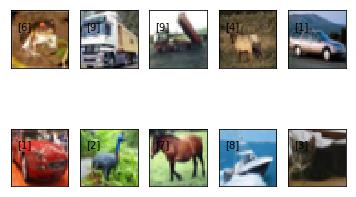

In [28]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [29]:
x_train.shape

(50000, 32, 32, 3)

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [30]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [18]:
y_train[0]

array([6], dtype=uint8)

In [32]:
# 归一化，并转换成float32类型
x_train = tf.cast(x_train/255, tf.float32)
x_test = tf.cast(x_test/255, tf.float32)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [38]:
# Build Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,[3,3],activation="relu", input_shape=(32,32,3)))    # 30*30
model.add(tf.keras.layers.Conv2D(64, [3,3], activation="relu"))    # 28*28
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))    # 14*14
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(32, [3,3], activation="relu"))  # 12*12
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation="relu"))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [55]:
# 训练模型
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
             validation_split=0.2, shuffle=True,
             loss=tf.keras.losses.categorical_crossentropy,metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=200, epochs=35)


Train on 50000 samples
Epoch 1/35
50000/50000 [==============================] - 73s 1ms/sample - loss: 2.3411 - accuracy: 0.1047
Epoch 2/35
50000/50000 [==============================] - 72s 1ms/sample - loss: 2.3102 - accuracy: 0.1138
Epoch 3/35
50000/50000 [==============================] - 72s 1ms/sample - loss: 2.2974 - accuracy: 0.1217
Epoch 4/35
50000/50000 [==============================] - 73s 1ms/sample - loss: 2.2854 - accuracy: 0.1327
Epoch 5/35
50000/50000 [==============================] - 72s 1ms/sample - loss: 2.2641 - accuracy: 0.1490
Epoch 6/35
50000/50000 [==============================] - 72s 1ms/sample - loss: 2.2358 - accuracy: 0.1689
Epoch 7/35
50000/50000 [==============================] - 72s 1ms/sample - loss: 2.2139 - accuracy: 0.1828
Epoch 8/35
50000/50000 [==============================] - 72s 1ms/sample - loss: 2.1775 - accuracy: 0.2028
Epoch 9/35
50000/50000 [==============================] - 72s 1ms/sample - loss: 2.4192 - accuracy: 0.1280
Epoch 10/35
50

In [56]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.20436382522583, 0.1938]

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [24]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [21]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = None
    
    # Sum over s  
    Z = None
    
    # Add bias b to z.
    Z = None
    
    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [ ]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = None
    
    return X_pad

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = None
    
    # Get information from "hparameters" 
    stride = None
    pad = None
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = None
    n_W = None
    
    # Initialize the output volume Z with zeros. 
    Z = None
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = None
    
    for i in range(None):               # loop over the batch of training examples
        a_prev_pad = None               # Select ith training example's padded activation
        for h in range(None):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = None
            vert_end = None
            
            for w in range(None):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = None
                horiz_end = None
                
                for c in range(None):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = None
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = None
                    biases = None
                    Z[i, h, w, c] = None
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(None):                         # loop over the training examples
        for h in range(None):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = None
            vert_end = None
            
            for w in range(None):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = None
                horiz_end = None
                
                for c in range (None):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = None
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = None
                    elif mode == "average":
                        A[i, h, w, c] = None
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.